### Look into Data to answer questions
---

In [27]:
import sys, os, json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(1, "../..")
plt.style.use("seaborn")

In [17]:
cols = ["sample_date", "user_id", "business_account_number", 
        "target", "nr_past_transactions", "nr_transactions_30d",
        "is_static"]
df = pd.read_feather("../../data/combined_all_features/combined_1635306403.feather",
                     columns=cols)

In [18]:
active_accounts = df[
    (df.nr_past_transactions > 0) & (df.nr_transactions_30d > 0)
].user_id.unique()
df.loc[:, "is_active"] = df.user_id.isin(active_accounts)

In [19]:
df.shape

(11624120, 8)

<AxesSubplot:>

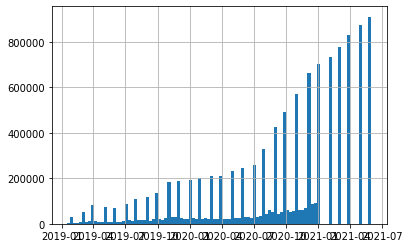

In [20]:
df.sample_date.hist(bins=100)

In [21]:
sdf = df[df.is_static]

<AxesSubplot:>

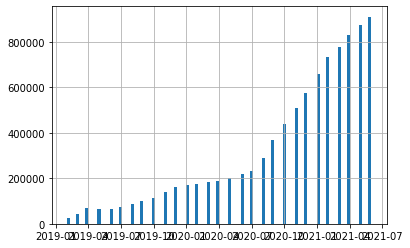

In [22]:
sdf.sample_date.hist(bins=100)

In [23]:
sdf.drop_duplicates(inplace=True)

/home/ec2-user/anaconda3/envs/pl_gen4/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [24]:
sdf.shape

(9290812, 8)

In [36]:
br = sdf.groupby("sample_date")["target"].mean()
br.head()
br.to_csv("../../artifacts/historical_bad_rate.csv")

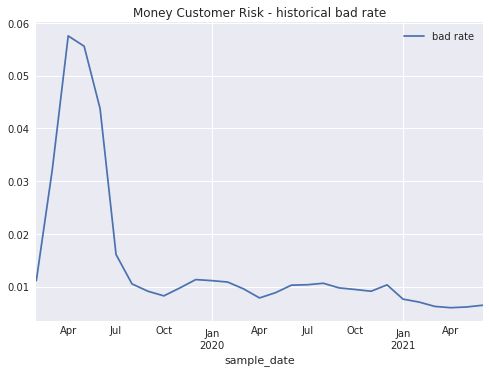

In [35]:
br.plot(label="bad rate")
plt.title("Money Customer Risk - historical bad rate")
plt.legend()
plt.show()